In [14]:
import pandas as pd
import numpy as np

# 데이터 불러오기
- WestRoxBury.csv 파일을 pandas로 불러오기
- 컬럼설명
 -  TOTAL VALUE : 주택가격(단위: 1000달러)
 -  TAX : 세금, 주택가격에 세율을 곱한 값에 근거한 세금계산서 금액(단위: 달러)
 -  LOT SQFT : 총 부지 면적(단위: 제곱 피트)
 -  YR BUILT : 건축 연도
 -  GROSS AREA : 총 바닥면적
 -  LIVING AREA : 주거 공간 총 면적(단위: 제곱 피트)
 -  FLOORS : 층 수
 -  ROOMS : 총 방 수
 -  BEDROOMS : 총 침실 수
 -  FULL BATH : 총 욕실 개수
 -  HALF BATH : 총 보조욕실 개수
 -  KITCHEN : 총 주방 개수
 -  FRIREPLACE : 총 벽난로 개수
 -  REMODEL : 언제 리모델링을 했는지 (최근/오래전/안함)

In [15]:
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/WestRoxbury.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TOTAL VALUE   5802 non-null   float64
 1   TAX           5802 non-null   int64  
 2   LOT SQFT      5802 non-null   int64  
 3   YR BUILT      5802 non-null   int64  
 4   GROSS AREA    5802 non-null   int64  
 5   LIVING AREA   5802 non-null   int64  
 6   FLOORS        5802 non-null   float64
 7   ROOMS         5802 non-null   int64  
 8   BEDROOMS      5802 non-null   int64  
 9   FULL BATH     5802 non-null   int64  
 10  HALF BATH     5802 non-null   int64  
 11  KITCHEN       5802 non-null   int64  
 12  FIREPLACE     5802 non-null   int64  
 13  REMODEL       1456 non-null   object 
dtypes: float64(2), int64(11), object(1)
memory usage: 634.7+ KB


,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,NaN
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,NaN
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,NaN


In [16]:
# df
# df.head()
# df.tail()
df.columns
# df.index
# df.info()
# df.isna()
# df.isna().sum()
# df.describe()
# df['TOTAL_VALUE'].describe()
# df[['REMODEL']].value_counts()
# df.shape,len(df)

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

## 컬럼명 일괄 바꾸기

In [17]:
# prompt: 컬럼명을 바꾸는 코드를 알려주세요

new_column_names = {
    'TOTAL VALUE ': 'TOTAL_VALUE',
    'TAX ': 'TAX',
    'LOT SQFT ': 'LOT_SQFT',
    'YR BUILT': 'YR_BUILT',
    'GROSS AREA ': 'GROSS_AREA',
    'LIVING AREA': 'LIVING_AREA',
    'FLOORS ': 'FLOORS',
    'ROOMS ': 'ROOMS',
    'BEDROOMS ': 'BEDROOMS',
    'FULL BATH': 'FULL_BATH',
    'HALF BATH': 'HALF_BATH',
    'KITCHEN ': 'KITCHEN',
    'FIREPLACE ': 'FIREPLACE',
    'REMODEL ': 'REMODEL'
}

df = df.rename(columns=new_column_names)
df.columns


Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [18]:
df

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,NaN
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,NaN
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,NaN


## 데이터 정제(Cleansing) - missing 값 처리

In [19]:
# df.info()
df['REMODEL'].value_counts(dropna=False)  # dropna 옵션은 missing값을 포함하는나 제외해서 하는냐에 대한 옵션

,count
REMODEL,
NaN,4346
Recent,875
Old,581


In [20]:
# prompt: please, give me the code how to  replace NaN value in remodel column

df['REMODEL'].fillna('None', inplace=True)  # missing 값을 "None"으로 대체
df

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,None
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,None
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,None


In [21]:
df.info()
df['REMODEL'].value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOTAL_VALUE  5802 non-null   float64
 1   TAX          5802 non-null   int64  
 2   LOT_SQFT     5802 non-null   int64  
 3   YR_BUILT     5802 non-null   int64  
 4   GROSS_AREA   5802 non-null   int64  
 5   LIVING_AREA  5802 non-null   int64  
 6   FLOORS       5802 non-null   float64
 7   ROOMS        5802 non-null   int64  
 8   BEDROOMS     5802 non-null   int64  
 9   FULL_BATH    5802 non-null   int64  
 10  HALF_BATH    5802 non-null   int64  
 11  KITCHEN      5802 non-null   int64  
 12  FIREPLACE    5802 non-null   int64  
 13  REMODEL      5802 non-null   object 
dtypes: float64(2), int64(11), object(1)
memory usage: 634.7+ KB


,count
REMODEL,
None,4346
Recent,875
Old,581


# 시각화를 통한 데이터 탐색 - Visualization
- 분포
- 그래프 ( plot, hist, bar, pie 등)
- 상자도표 ( Boxplot )
- 산점도 ( scatter )
- 히트맵 ( heatmap )

### 분포확인(Distribution)

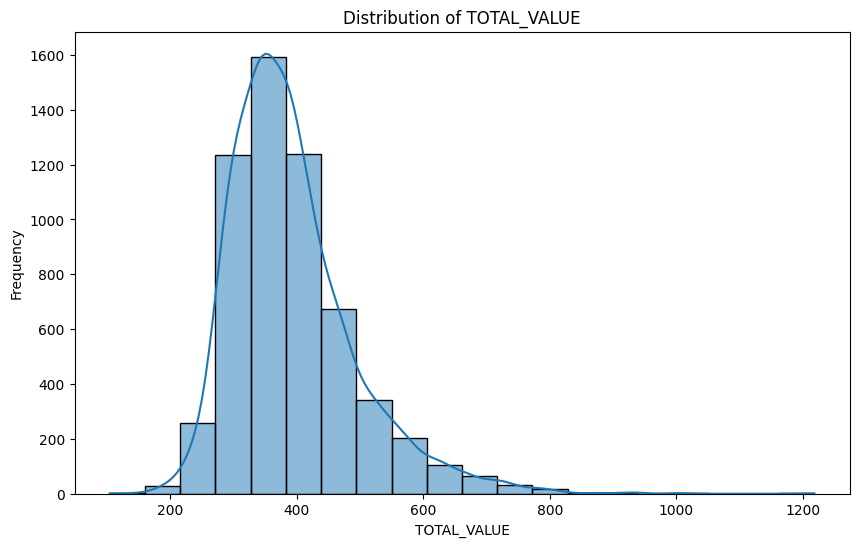

In [22]:
# prompt: give me the code to show TOTAL_VALUE distribution

import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램으로 TOTAL_VALUE 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL_VALUE'], bins=20, kde=True)
plt.title('Distribution of TOTAL_VALUE')
plt.xlabel('TOTAL_VALUE')
plt.ylabel('Frequency')
plt.show()


In [23]:
df['TOTAL_VALUE'].describe()

,TOTAL_VALUE
count,5802.000000
mean,392.685715
std,99.177414
min,105.000000
25%,325.125000
50%,375.900000
75%,438.775000
max,1217.800000


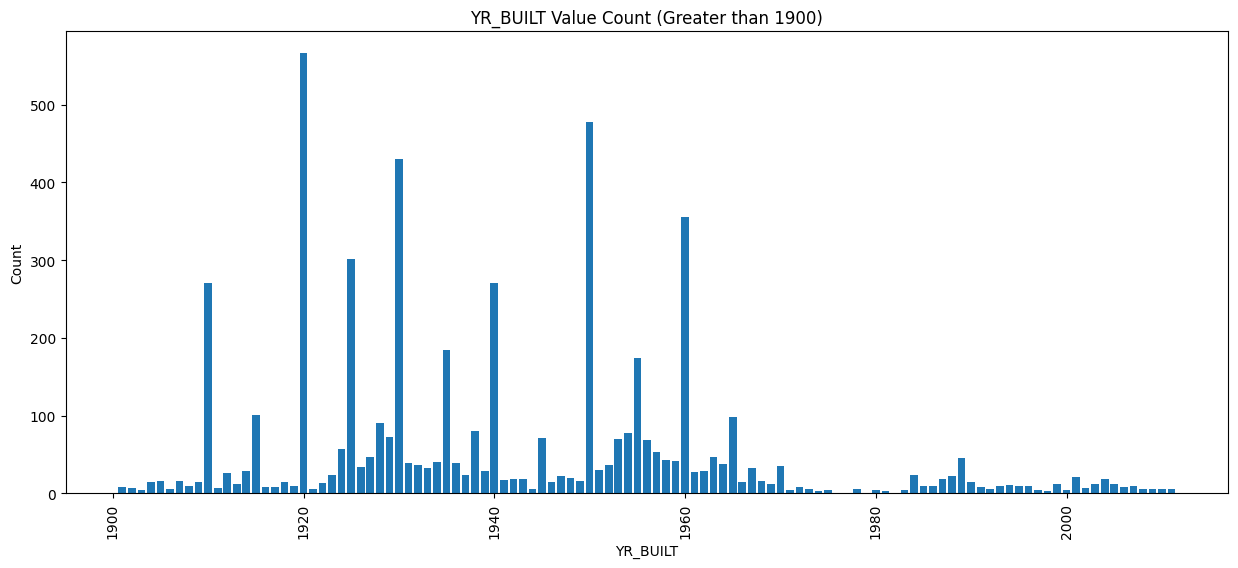

In [24]:
# prompt: please, give me the code to show the plot which YR_BUILT value has more than 1900

import matplotlib.pyplot as plt

# YR_BUILT가 1900보다 큰 데이터만 선택
df_filtered = df[df['YR_BUILT'] > 1900]

# YR_BUILT의 값별 빈도수 계산
yr_built_counts = df_filtered['YR_BUILT'].value_counts()

# 막대 그래프로 시각화
plt.figure(figsize=(15, 6))
plt.bar(yr_built_counts.index, yr_built_counts.values)
plt.xlabel('YR_BUILT')
plt.ylabel('Count')
plt.title('YR_BUILT Value Count (Greater than 1900)')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()


### 박스플랏 ( Boxplot )

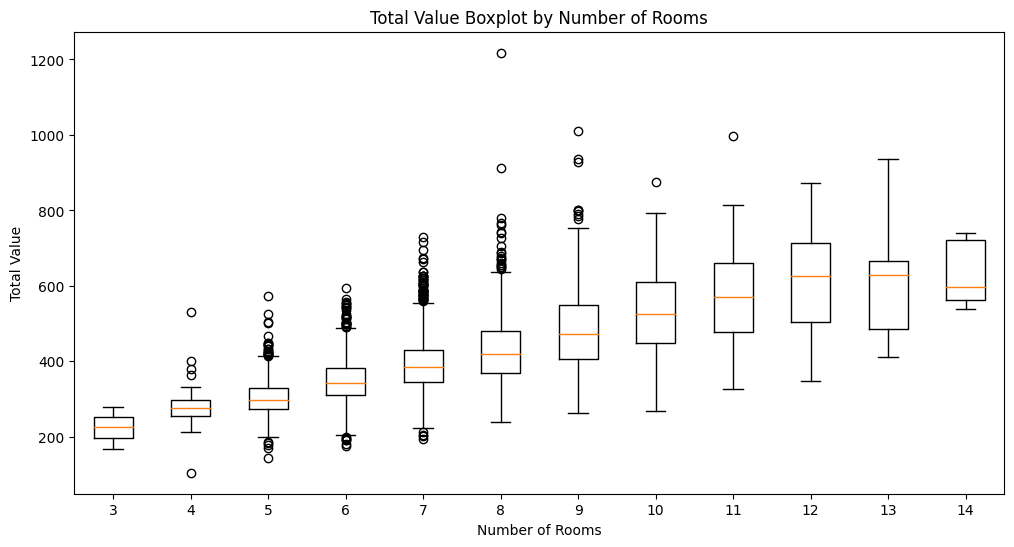

In [25]:
# prompt: pls, give me the code to generate total_value boxplot by ordered rooms using matplotlib

import matplotlib.pyplot as plt

# 'ROOMS' 기준으로 오름차순 정렬
df_sorted = df.sort_values('ROOMS')

# 'ROOMS' 값에 따라 'TOTAL_VALUE'의 박스플롯 생성
plt.figure(figsize=(12, 6))
plt.boxplot([df_sorted['TOTAL_VALUE'][df_sorted['ROOMS'] == i] for i in sorted(df_sorted['ROOMS'].unique())],
            labels=sorted(df_sorted['ROOMS'].unique()))
plt.xlabel('Number of Rooms')
plt.ylabel('Total Value')
plt.title('Total Value Boxplot by Number of Rooms')
plt.show()


In [26]:
df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

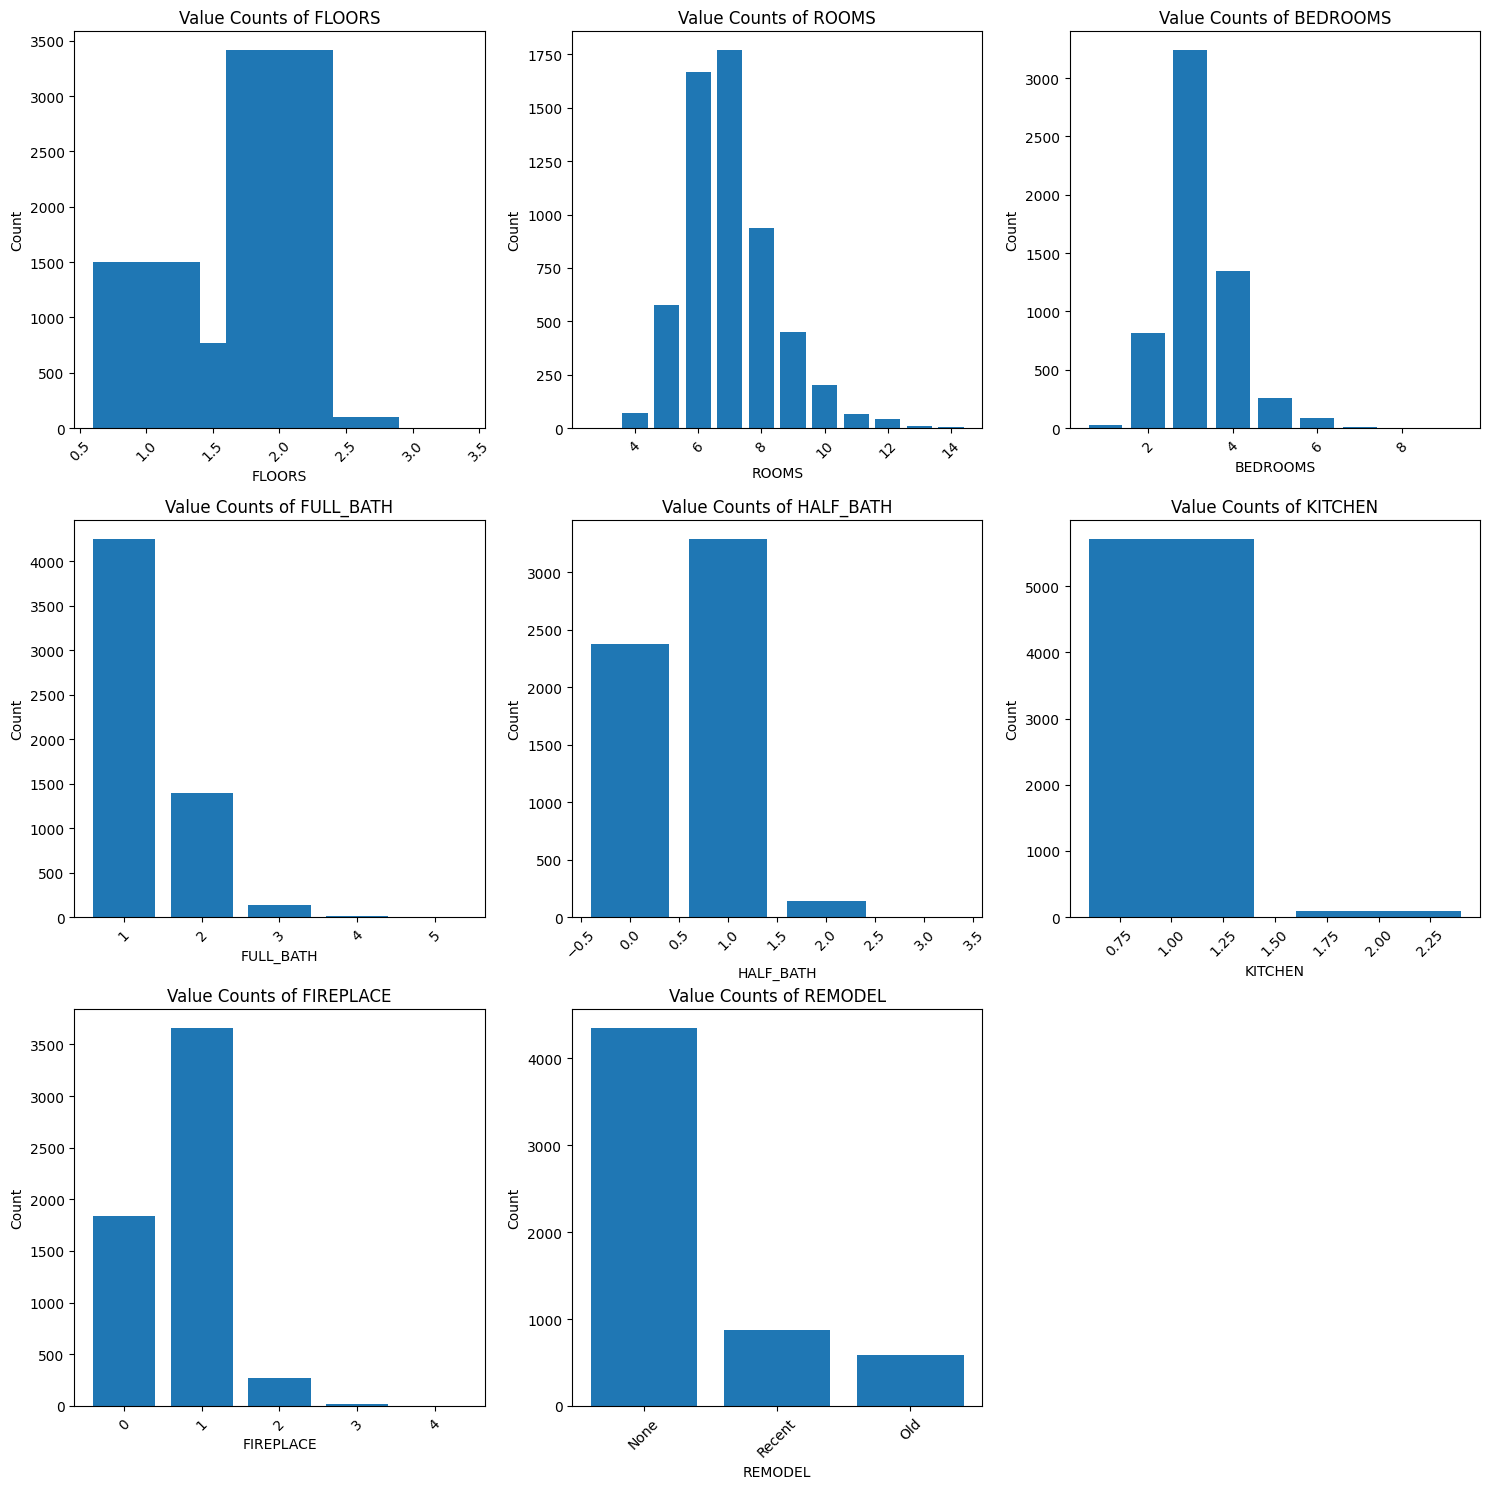

In [ ]:
# prompt: FLOORS, ROOMS, BEDROOMS, FULL_BATH, HALF_BATH, KITCHEN, FIREPLACE, REMODEL  컬럼에 대해 막대그래프를 3개의 열로 각각 그리는 코드를 제공해주세요

import matplotlib.pyplot as plt

# 막대 그래프를 그릴 컬럼 리스트
columns_to_plot = ['FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL']

# 한 줄에 3개의 그래프를 표시하기 위한 설정
num_cols = 3
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# 그래프를 그리는 반복문
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
for i, col in enumerate(columns_to_plot):
    row = i // num_cols
    col_num = i % num_cols

    value_counts = df[col].value_counts()
    axes[row, col_num].bar(value_counts.index, value_counts.values)
    axes[row, col_num].set_xlabel(col)
    axes[row, col_num].set_ylabel('Count')
    axes[row, col_num].set_title(f'Value Counts of {col}')
    plt.sca(axes[row, col_num])
    plt.xticks(rotation=45)  # x축 레이블 회전

# 남은 subplot 제거
for i in range(len(columns_to_plot), num_rows * num_cols):
    row = i // num_cols
    col_num = i % num_cols
    fig.delaxes(axes[row, col_num])

plt.tight_layout()
plt.show()


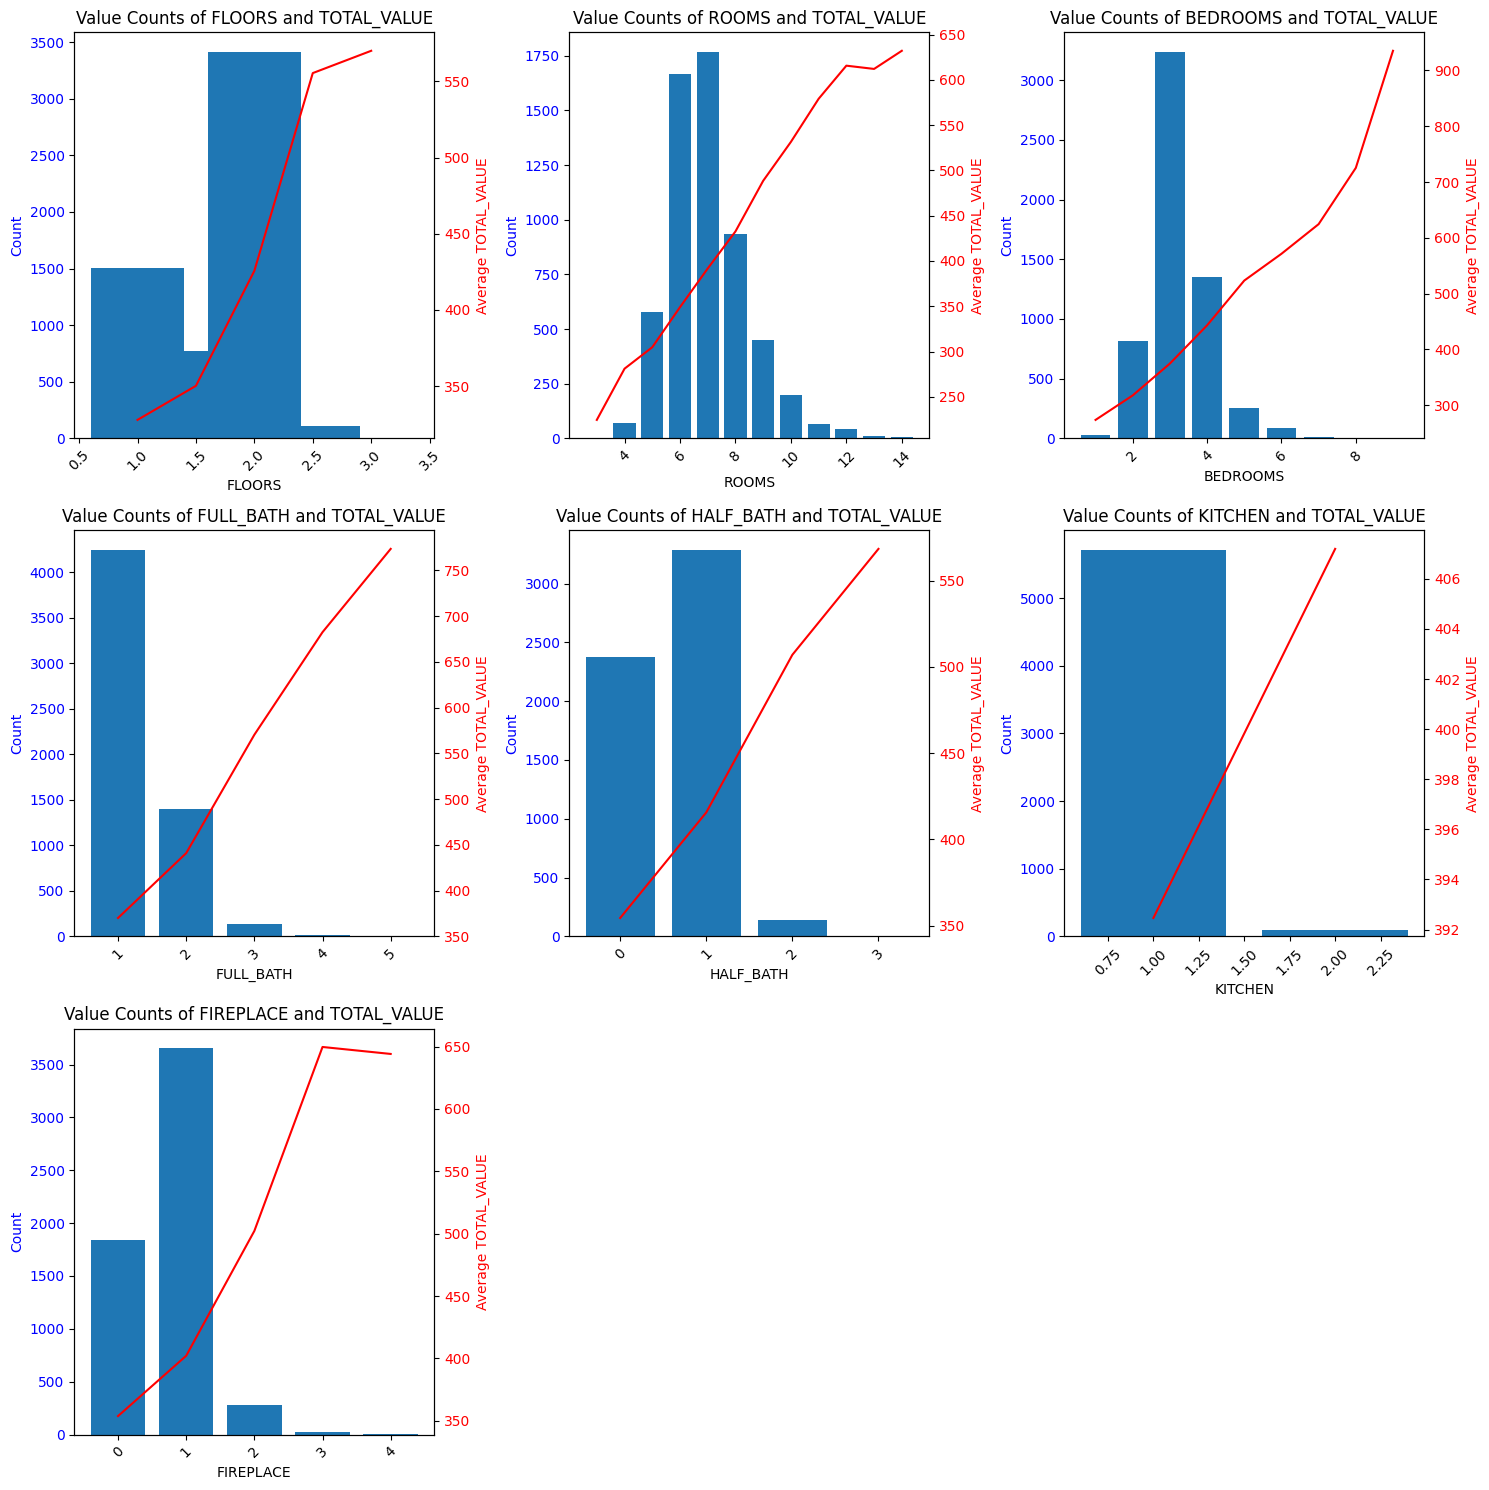

In [27]:
# prompt: FLOORS, ROOMS, BEDROOMS, FULL_BATH, HALF_BATH, KITCHEN, FIREPLACE, REMODEL 컬럼에 대해 왼쪽축 기준으로 막대 그래프를 그리고 오른쪽 축에는 TOTAL_VALUE 컬럼에 대해 선 그래프를 그리는 코드를 제공해주세요

import matplotlib.pyplot as plt

# 막대 그래프를 그릴 컬럼 리스트
columns_to_plot = ['FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH', 'KITCHEN', 'FIREPLACE']

# 한 줄에 3개의 그래프를 표시하기 위한 설정
num_cols = 3
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# 그래프를 그리는 반복문
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
for i, col in enumerate(columns_to_plot):
    row = i // num_cols
    col_num = i % num_cols

    # 막대 그래프
    value_counts = df[col].value_counts()
    ax1 = axes[row, col_num]
    ax1.bar(value_counts.index, value_counts.values)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Count', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'Value Counts of {col} and TOTAL_VALUE')
    plt.sca(ax1)
    plt.xticks(rotation=45)  # x축 레이블 회전

    # 선 그래프 (오른쪽 축)
    ax2 = ax1.twinx()
    ax2.plot(df.groupby(col)['TOTAL_VALUE'].mean(), color='red')
    ax2.set_ylabel('Average TOTAL_VALUE', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

# 남은 subplot 제거
for i in range(len(columns_to_plot), num_rows * num_cols):
    row = i // num_cols
    col_num = i % num_cols
    fig.delaxes(axes[row, col_num])

plt.tight_layout()
plt.show()


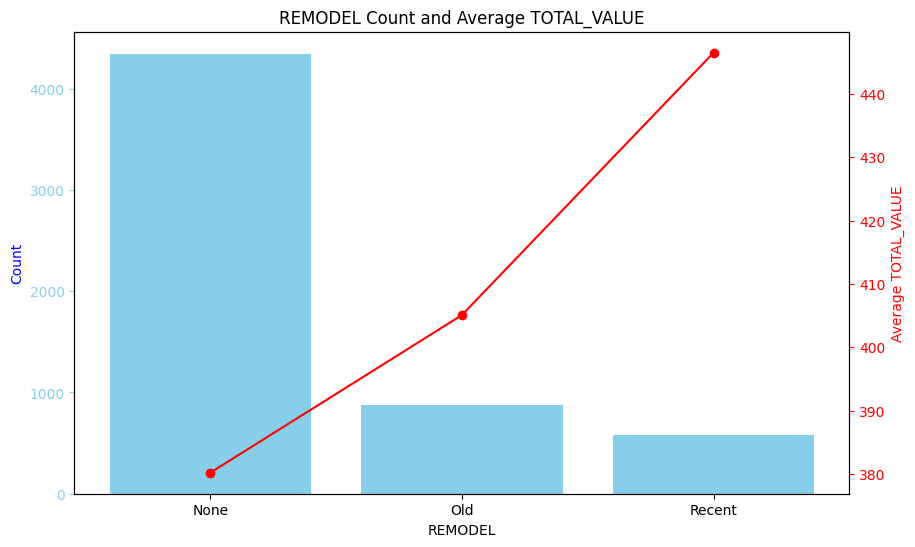

In [ ]:
# prompt: REMODEL 컬럼에 대해 왼쪽축 기준으로 막대 그래프를 그리고 오른쪽 축에는 TOTAL_VALUE 컬럼에 대해 선 그래프를 그리는 코드를 제공해주세요

import matplotlib.pyplot as plt

# REMODEL 컬럼의 빈도수 계산
remodel_counts = df['REMODEL'].value_counts()

# 막대 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(remodel_counts.index, remodel_counts.values, color='skyblue')
ax1.set_xlabel('REMODEL')
ax1.set_ylabel('Count', color='skyblue')
ax1.tick_params('y', colors='skyblue')

# 오른쪽 축 생성
ax2 = ax1.twinx()

# TOTAL_VALUE 컬럼의 평균값 계산 (REMODEL 별로)
total_value_by_remodel = df.groupby('REMODEL')['TOTAL_VALUE'].mean()

# 선 그래프 그리기
ax2.plot(total_value_by_remodel.index, total_value_by_remodel.values, color='red', marker='o')
ax2.set_ylabel('Average TOTAL_VALUE', color='red')
ax2.tick_params('y', colors='red')

plt.title('REMODEL Count and Average TOTAL_VALUE')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()


### 산점도 ( scatter plot )

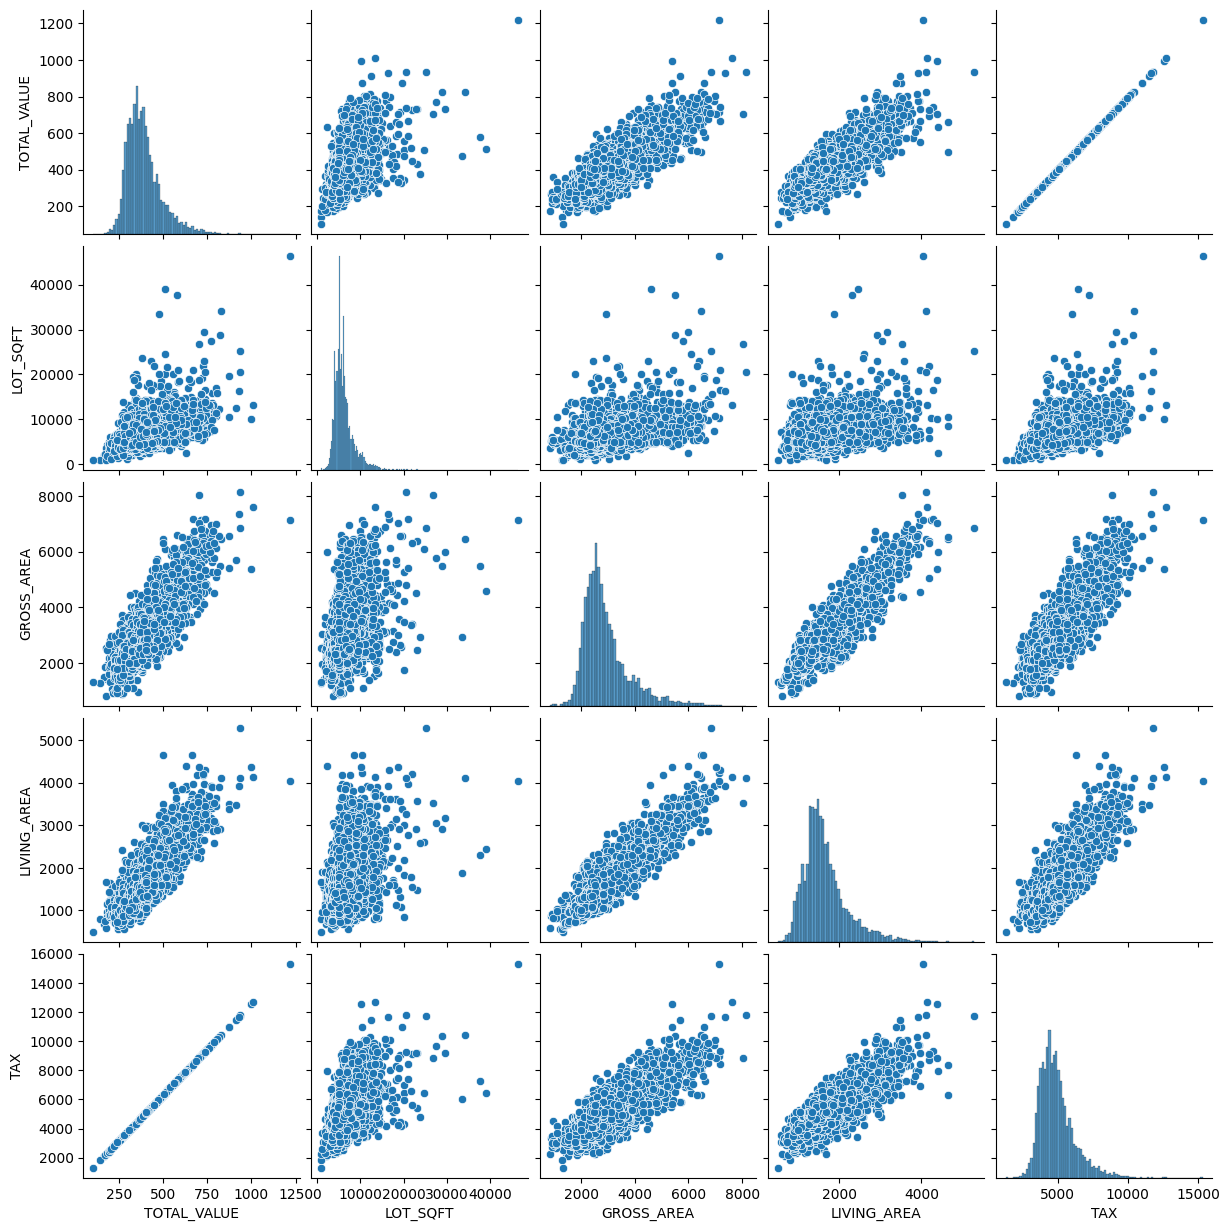

In [ ]:
# prompt: seaborn을 이용하여 연속형변수의 산점도를 산출할 수 있는 코드를 제공해주세요

import matplotlib.pyplot as plt
sns.pairplot(df[['TOTAL_VALUE', 'LOT_SQFT', 'GROSS_AREA', 'LIVING_AREA','TAX']])
plt.show()

### 상관관계 결과를 이용한 HeatMap 그래프

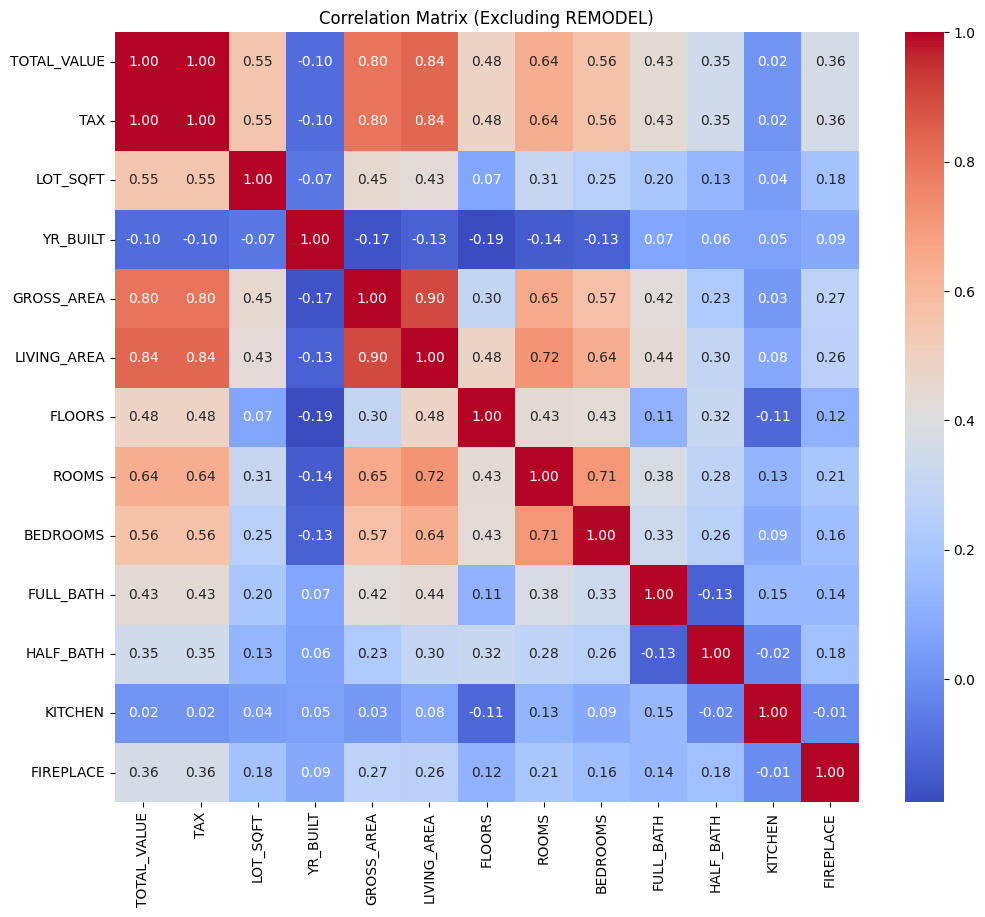

In [ ]:
# prompt: REMODEL 컬럼을 제외하고 heatmap을 작성할 수 있는 코드를 제공해주세요

import matplotlib.pyplot as plt
# REMODEL 컬럼 제외하고 상관계수 계산
correlation_matrix = df.drop('REMODEL', axis=1).corr()

# Heatmap 생성
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Excluding REMODEL)')
plt.show()


## 정규화(Normalization) - 연속형 형태의 변수를 [0,1] 사이의 값으로 변환

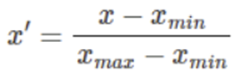

In [ ]:
# prompt: scikit learn에서 제공하는 정규화 함수를 이용하여 연속형 변수를 정규화하되 컬럼명이 다른 이름을 갖도록 하는 코드를 제공해주세요

from sklearn.preprocessing import MinMaxScaler

# 정규화할 컬럼 선택 (연속형 변수만 선택)
numerical_cols = ['TOTAL_VALUE', 'LOT_SQFT', 'GROSS_AREA', 'LIVING_AREA']

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 선택한 컬럼에 대해 정규화 수행
df_normalized = df.copy()  # 원본 데이터프레임 복사
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 컬럼명 변경 (새로운 컬럼명 지정)
new_column_names = [col + '_normalized' for col in numerical_cols]
df_normalized.rename(columns=dict(zip(numerical_cols, new_column_names)), inplace=True)

In [ ]:
df_normalized

,TOTAL_VALUE_normalized,TAX,LOT_SQFT_normalized,YR_BUILT,GROSS_AREA_normalized,LIVING_AREA_normalized,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,0.214953,4330,0.197472,1880,0.220237,0.177220,2.0,6,3,1,1,1,0,None
1,0.276420,5190,0.123156,1945,0.311878,0.307628,2.0,10,4,2,1,1,0,Recent
2,0.202283,4152,0.143194,1890,0.200873,0.181191,2.0,8,4,1,1,1,0,None
3,0.353702,6272,0.281323,1957,0.574253,0.439707,1.0,9,5,1,1,1,1,None
4,0.203541,4170,0.088145,1910,0.211237,0.195193,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,0.269410,5092,0.126943,1938,0.241784,0.252874,2.0,9,3,2,1,1,1,Recent
5798,0.272196,5131,0.185207,1950,0.217237,0.173250,2.0,6,3,1,1,1,1,None
5799,0.270938,5113,0.136544,1987,0.226238,0.244514,2.0,7,3,1,1,1,1,None
5800,0.183052,3883,0.129762,1946,0.160780,0.103657,1.0,5,2,1,0,1,0,None


In [ ]:
# prompt: df_normalized 데이터셋에서 scikit learn에서 제공하는 표준화 함수를 이용하여 TAX 변수를 표준화하는 코드를 제공하되 이름은 다른이름을 갖도록 하고 동일한 데이터셋에서 생성하도록 하는 코드를 제공해주세요

from sklearn.preprocessing import StandardScaler

# 표준화할 컬럼 선택 (TAX 변수)
standardize_col = ['TAX']

# StandardScaler 객체 생성
scaler = StandardScaler()

# 선택한 컬럼에 대해 표준화 수행
df_standardized = df_normalized.copy()  # df_normalized 데이터셋 복사
df_standardized['TAX_standardized'] = scaler.fit_transform(df_normalized[standardize_col])

# 결과 출력
df_standardized

,TOTAL_VALUE_normalized,TAX,LOT_SQFT_normalized,YR_BUILT,GROSS_AREA_normalized,LIVING_AREA_normalized,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL,TAX_standardized
0,0.214953,4330,0.197472,1880,0.220237,0.177220,2.0,6,3,1,1,1,0,None,-0.488550
1,0.276420,5190,0.123156,1945,0.311878,0.307628,2.0,10,4,2,1,1,0,Recent,0.200806
2,0.202283,4152,0.143194,1890,0.200873,0.181191,2.0,8,4,1,1,1,0,None,-0.631230
3,0.353702,6272,0.281323,1957,0.574253,0.439707,1.0,9,5,1,1,1,1,None,1.068112
4,0.203541,4170,0.088145,1910,0.211237,0.195193,2.0,7,3,2,0,1,0,None,-0.616802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,0.269410,5092,0.126943,1938,0.241784,0.252874,2.0,9,3,2,1,1,1,Recent,0.122252
5798,0.272196,5131,0.185207,1950,0.217237,0.173250,2.0,6,3,1,1,1,1,None,0.153513
5799,0.270938,5113,0.136544,1987,0.226238,0.244514,2.0,7,3,1,1,1,1,None,0.139085
5800,0.183052,3883,0.129762,1946,0.160780,0.103657,1.0,5,2,1,0,1,0,None,-0.846854


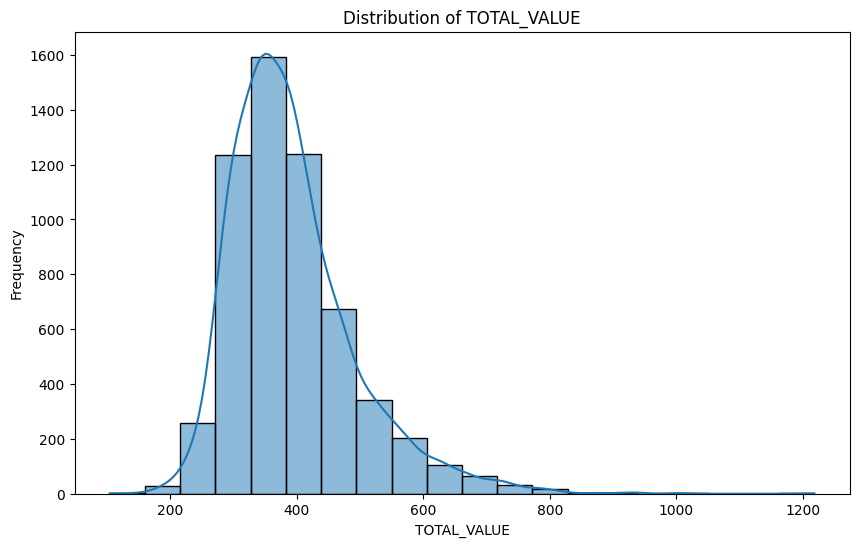

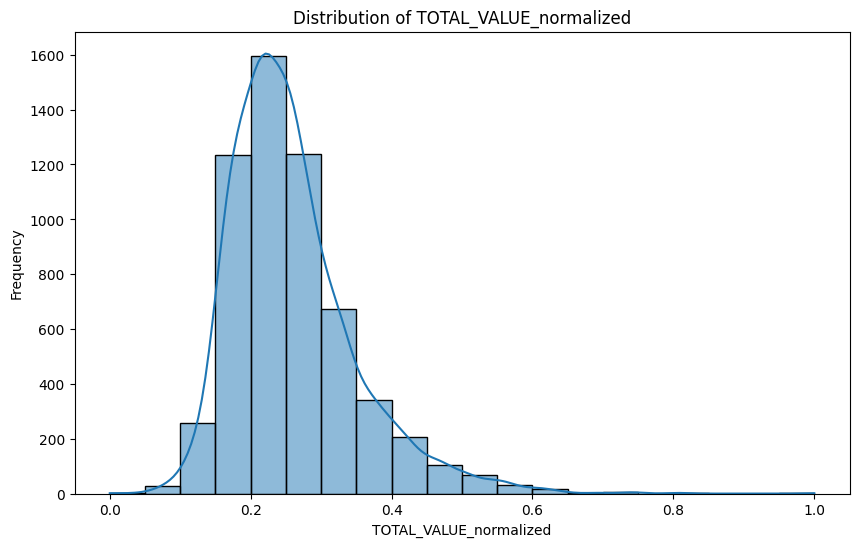

In [ ]:
# prompt: give me the code to show TOTAL_VALUE distribution

# 히스토그램으로 TOTAL_VALUE 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL_VALUE'], bins=20, kde=True)
plt.title('Distribution of TOTAL_VALUE')
plt.xlabel('TOTAL_VALUE')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df_standardized['TOTAL_VALUE_normalized'], bins=20, kde=True)
plt.title('Distribution of TOTAL_VALUE_normalized')
plt.xlabel('TOTAL_VALUE_normalized')
plt.ylabel('Frequency')
plt.show()


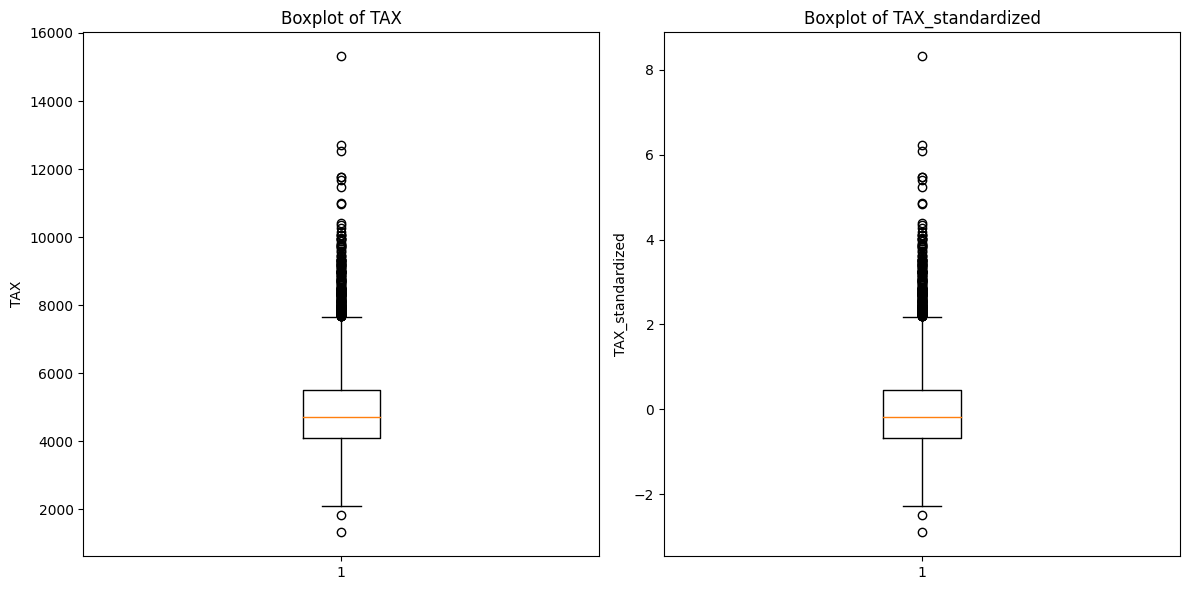

In [ ]:
# prompt: df_standardized 데이터 셋에 있는 TAX 컬럼과 TAX_standardized 컬럼에 대해 Boxplot 그래프를 matplotlib을 이용하여 그리되,  2개의 열에 나타나게 그릴 수 있는 코드를 제공해주세요

import matplotlib.pyplot as plt

# 두 개의 열에 박스플롯을 그리기 위한 설정
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# TAX 컬럼에 대한 박스플롯
axes[0].boxplot(df_standardized['TAX'])
axes[0].set_title('Boxplot of TAX')
axes[0].set_ylabel('TAX')

# TAX_standardized 컬럼에 대한 박스플롯
axes[1].boxplot(df_standardized['TAX_standardized'])
axes[1].set_title('Boxplot of TAX_standardized')
axes[1].set_ylabel('TAX_standardized')

plt.tight_layout()
plt.show()


# Train, Validation, Test 데이터 셋 구분
- scikit-learn 모듈에서 train_test_split() 함수를 이요하여 데이터 셋 구분

In [ ]:
# prompt: df_standardized 데이터셋을 train, validation, test으로 구분하는 코드를 제공해주세요

from sklearn.model_selection import train_test_split

# 데이터를 train, test set으로 분할 (test_size=0.2로 20%를 test set으로 할당)
df_train, df_test = train_test_split(df_standardized, test_size=0.2, random_state=42)

# train set을 다시 train, validation set으로 분할 (validation_size=0.2로 20%를 validation set으로 할당)
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=42)

# 결과 확인 (각 데이터셋의 크기 출력)
print(f"Train set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")


Train set size: 3712
Validation set size: 929
Test set size: 1161


In [ ]:
df_train.info(), df_val.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3712 entries, 4976 to 169
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TOTAL_VALUE_normalized  3712 non-null   float64
 1   TAX                     3712 non-null   int64  
 2   LOT_SQFT_normalized     3712 non-null   float64
 3   YR_BUILT                3712 non-null   int64  
 4   GROSS_AREA_normalized   3712 non-null   float64
 5   LIVING_AREA_normalized  3712 non-null   float64
 6   FLOORS                  3712 non-null   float64
 7   ROOMS                   3712 non-null   int64  
 8   BEDROOMS                3712 non-null   int64  
 9   FULL_BATH               3712 non-null   int64  
 10  HALF_BATH               3712 non-null   int64  
 11  KITCHEN                 3712 non-null   int64  
 12  FIREPLACE               3712 non-null   int64  
 13  REMODEL                 3712 non-null   object 
 14  TAX_standardized        3712 non-null   flo

(None, None, None)